PAP

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

from AA import DataDownloader, AssetAllocation, HierarchicalRiskParity, DynamicBacktester

C:\Users\pmonr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\pmonr\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
downloader = DataDownloader()

assets = ['AAPL', 'IBM', 'TSLA', 'GOOG', 'NVDA'] 
benchmark = '^GSPC'  
start_date = '2019-01-01'
end_date = '2023-12-31'
rf = .065
ff_factors_expectations = {'Mkt-RF': 0.05, 'SMB': 0.02, 'HML': 0.03, 'RF': 0.02}

asset_prices, benchmark_prices, ff_factors = downloader.download_data(start_date=start_date, end_date=end_date,
                                                                      assets=assets, benchmark=benchmark)

# Default limits for every asset (min 1% - max 100%):  boounds = tuple((0.01, 1) for _ in range(self.num_assets))
Asset_allocation = AssetAllocation(asset_prices=asset_prices, benchmark_prices=benchmark_prices, rf=rf, 
                                   ff_factors=ff_factors, ff_factors_expectations=ff_factors_expectations) 

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Set Black-Litterman Expectations (Optional) 

P = np.array([
    [1, 0, 0, -1, 0],  
    [0, 1, -1, 0, 0],
    [0, 0, 0, 0, 1],
])

Q = np.array([0.05,  
              0.03,
              -0.15])  

Omega = np.diag([0.1**2, 0.15**2, 0.08**2])  # Incertidumbre en las vistas
tau = 0.08  # Incertidumbre en los rendimientos de equilibrio

Asset_allocation.set_blacklitterman_expectations(P, Q, tau, Omega)

In [4]:
Asset_allocation.Optimize_Portfolio(n_simulations = 10000) #Default Method == "Montecarlo"

Ticker,AAPL,GOOG,IBM,NVDA,TSLA,Optimized Value
Max Sharpe,0.141224,0.012234,0.017216,0.581083,0.248243,1.267117
Max (Smart) Sharpe,0.027206,0.022735,0.044439,0.532093,0.373527,1.195080
Max Omega,0.416243,0.011373,0.306882,0.202300,0.063203,1.347072
Max (Smart) Omega,0.019959,0.014120,0.259622,0.138148,0.568152,1.202598
Min VaR (Empirical),0.038815,0.041711,0.060035,0.012548,0.846891,-0.053623
Min VaR (Parametric),0.169231,0.240233,0.553791,0.021898,0.014847,-0.024576
Semivariance,0.232834,0.147644,0.589615,0.015872,0.014034,0.000224
Safety-First,0.167594,0.012535,0.013336,0.537493,0.269042,0.079928
Max Sortino,0.051481,0.022290,0.019960,0.694361,0.211908,0.115320
Risk Parity,0.012810,0.021191,0.084905,0.028924,0.852169,0.000945


In [5]:
print(Asset_allocation.Optimize_Portfolio(method = "SLSQP"))

Ticker                    AAPL      GOOG       IBM      NVDA      TSLA  \
Max Sharpe            0.212822  0.010000  0.010000  0.507455  0.259723   
Max (Smart) Sharpe    0.010000  0.010000  0.010000  0.569683  0.400317   
Max Omega             0.367592  0.018849  0.313469  0.213551  0.086539   
Max (Smart) Omega     0.010000  0.010000  0.201529  0.125327  0.653144   
Min VaR (Empirical)   0.010000  0.010000  0.010000  0.389208  0.580792   
Min VaR (Parametric)  0.156482  0.217159  0.606360  0.010000  0.010000   
Semivariance          0.200000  0.200000  0.200000  0.200000  0.200000   
Safety-First          0.221457  0.010000  0.010000  0.501680  0.256863   
Max Sortino           0.010000  0.010000  0.010000  0.747532  0.222468   
Risk Parity           0.200000  0.200000  0.200000  0.200000  0.200000   
CVaR                  0.010000  0.010000  0.010000  0.479551  0.490449   
Black-Litterman       0.250931  0.261034  0.296732  0.181303  0.010000   
HRP                   0.153590  0.1576

In [6]:
Asset_allocation.Optimize_Portfolio(method = "Genetic", population_size=100, generations=200, crossover_rate=0.7, mutation_rate=0.1)

Ticker,AAPL,GOOG,IBM,NVDA,TSLA,Optimized Value
Max Sharpe,0.211820,0.038066,0.116850,0.381676,0.251589,1.251501
Max (Smart) Sharpe,0.109718,0.016108,0.131307,0.476370,0.266497,1.257696
Max Omega,0.426599,0.006559,0.326504,0.148832,0.091505,1.341965
Max (Smart) Omega,0.029145,0.096233,0.183230,0.376108,0.315284,1.290479
Min VaR (Empirical),0.042888,0.101258,0.032268,0.404477,0.419109,-0.046140
Min VaR (Parametric),0.174213,0.099002,0.367103,0.227615,0.132068,-0.032020
Semivariance,0.040888,0.039372,0.664762,0.093892,0.161086,0.000277
Safety-First,0.221789,0.078888,0.012631,0.470025,0.216667,0.078960
Max Sortino,0.342717,0.055954,0.025512,0.356246,0.219571,0.110822
Risk Parity,0.011103,0.010744,0.010833,0.019219,0.948100,0.001185


In [7]:
Asset_allocation.Optimize_Portfolio(method = "Gradient", learning_rate=0.01, max_iters=1000, tol=1e-6)

Ticker,AAPL,GOOG,IBM,NVDA,TSLA,Optimized Value
Max Sharpe,0.248382,0.009941,0.105160,0.386120,0.250397,1.258846
Max (Smart) Sharpe,0.169676,0.009953,0.079293,0.398525,0.342552,1.254626
Max Omega,0.343641,0.031768,0.318282,0.218632,0.087678,1.347932
Max (Smart) Omega,0.009988,0.009988,0.238967,0.176549,0.564509,1.238831
Min VaR (Empirical),0.199397,0.201444,0.199150,0.196247,0.203763,-0.035712
Min VaR (Parametric),0.255781,0.282329,0.441872,0.010009,0.010009,-0.022531
Semivariance,0.200001,0.200002,0.200005,0.199997,0.199995,0.000401
Safety-First,0.218456,0.079268,0.141724,0.316454,0.244097,0.077620
Max Sortino,0.231153,0.029324,0.061046,0.413851,0.264625,0.112007
Risk Parity,0.199999,0.199999,0.199999,0.200001,0.200002,0.000014


[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

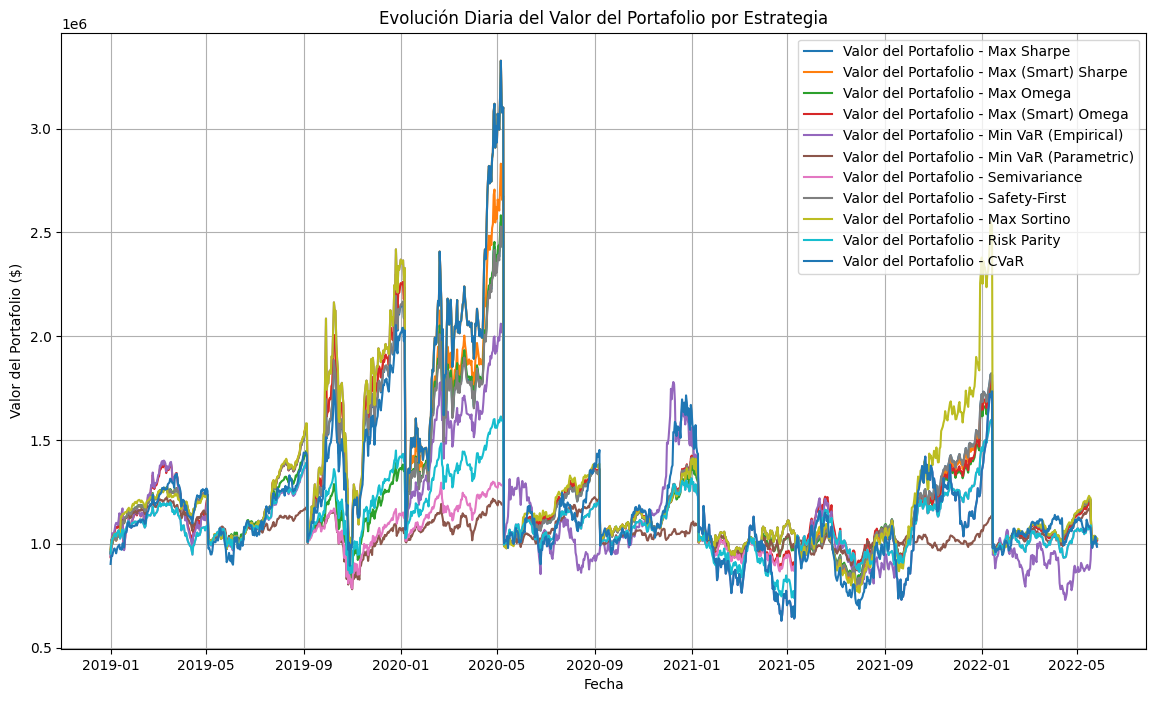

In [9]:
Backtest = DynamicBacktester(start_date, end_date, assets, benchmark, initial_capital=1_000_000,
                             strategies=["Max Sharpe", "Max (Smart) Sharpe", "Max Omega", "Max (Smart) Omega", "Min VaR (Empirical)", "Min VaR (Parametric)",
                                         "Semivariance", "Safety-First","Max Sortino","Risk Parity","CVaR"],
                             rf=rf, ff_factors_expectations=ff_factors_expectations, method = 'SLSQP')

Backtest.run_backtest()

-----

-------

--------------

----------